# data set from kaggle
The purpose of this database is to provide information about a bank's customers 
so that machine learning models can be developed that can predict whether a particular customer will
repay the loan or not.

clientid = Client id Person

income = Income of the client

age = Age of client

loan = Load value.

default = 1 : default , 0 : not default

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('original.csv')
print(df.head())
print(df.shape)

   clientid        income        age         loan  default
0         1  66155.925095  59.017015  8106.532131        0
1         2  34415.153966  48.117153  6564.745018        0
2         3  57317.170063  63.108049  8020.953296        0
3         4  42709.534201  45.751972  6103.642260        0
4         5  66952.688845  18.584336  8770.099235        1
(2000, 5)


In [4]:
df.describe().drop('clientid',axis=1)

,income,age,loan,default
count,2000.000000,1997.000000,2000.000000,2000.000000
mean,45331.600018,40.807559,4444.369695,0.141500
std,14326.327119,13.624469,3045.410024,0.348624
min,20014.489470,-52.423280,1.377630,0.000000
25%,32796.459717,28.990415,1939.708847,0.000000
50%,45789.117313,41.317159,3974.719419,0.000000
75%,57791.281668,52.587040,6432.410625,0.000000
max,69995.685578,63.971796,13766.051239,1.000000


<AxesSubplot:>

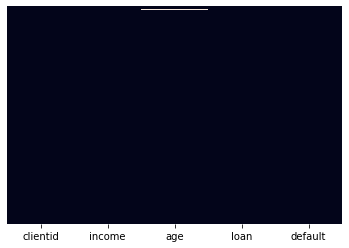

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [6]:
df.isnull()['age'].value_counts()

False    1997
True        3
Name: age, dtype: int64

<AxesSubplot:>

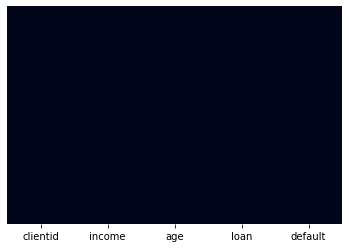

In [7]:
df['age'].fillna(df['age'].mean(),inplace=True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

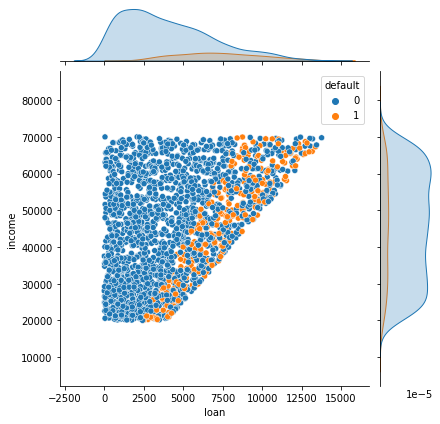

In [8]:
sns.jointplot(x='loan',y='income',data=df,hue='default')

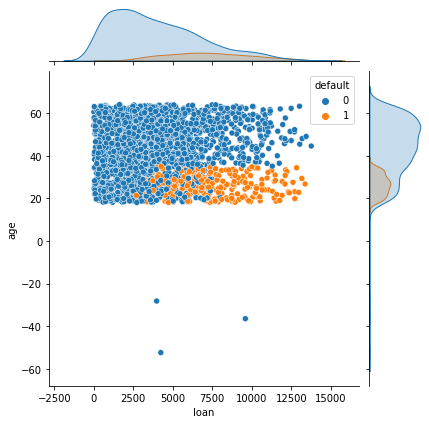

In [9]:
sns.jointplot(x='loan',y='age',data=df,hue='default')
#คนที่ default ส่วนใหญ่จะอายุ 20-30 ปลายๆ และ loan > 5000

In [10]:
df.drop(df[df['age']<0].index,axis=0,inplace=True)

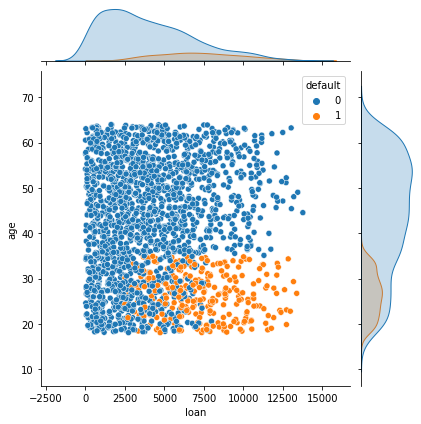

In [11]:
sns.jointplot(x='loan',y='age',data=df,hue='default')

logistic 

In [45]:
from sklearn.model_selection import train_test_split
X = df.drop(['clientid','default'],axis=1)
y = df['default']
X_train ,X_test , y_train, y_test = train_test_split(X,y,test_size=0.3)

In [47]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train,y_train)
y_log = log_model.predict(X_test)

In [48]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_log))
print(confusion_matrix(y_test,y_log))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       519
           1       0.77      0.51      0.61        81

    accuracy                           0.91       600
   macro avg       0.85      0.74      0.78       600
weighted avg       0.91      0.91      0.91       600

[[507  12]
 [ 40  41]]
